<a href="https://colab.research.google.com/github/smu-linear-algebra2/mj/blob/main/%EB%B6%93%EA%BD%83_%EB%B6%84%EB%A5%982.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


In [2]:
import os
os.listdir()

['.config', 'Iris (1).csv', 'Iris.csv', 'sample_data']

In [3]:
import pandas as pd
import numpy as np

# 파일을 불러오기
iris_df = pd.read_csv("Iris.csv")

selected_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = iris_df[selected_columns].values

species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
Y = iris_df['Species'].map(species_mapping).values

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


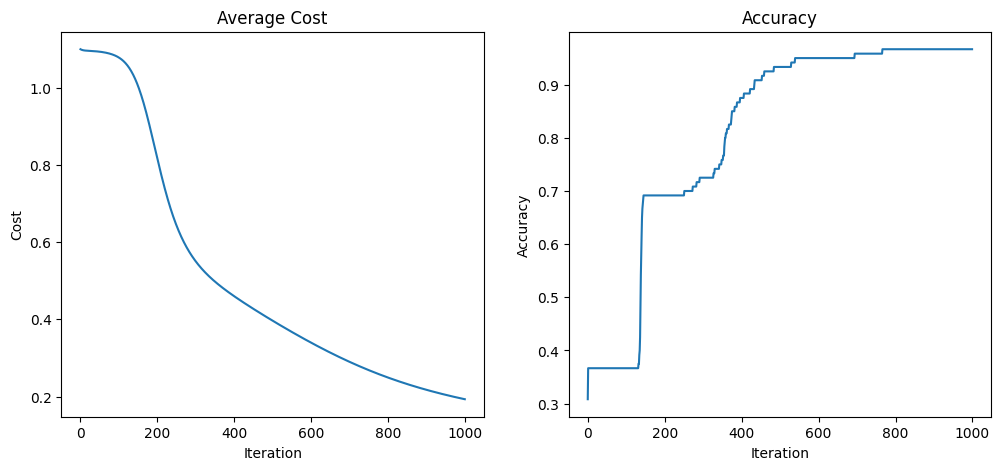

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return e_x / np.sum(e_x, axis=0, keepdims=True)

def feed_forward(X, W1, W2, b1, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return A1, A2, Z1, Z2

def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(A2)) / m
    return cost

def calculate_accuracy(predictions, targets):
    return np.mean(predictions == targets)

def predict(W1, W2, b1, b2, X):
    _, A2, _, _ = feed_forward(X, W1, W2, b1, b2)
    predictions = np.argmax(A2, axis=0)
    return predictions

# Load and prepare the data
iris = load_iris()
X = iris.data.T
Y = iris.target.reshape(-1, 1)

# One-hot encode the target values
encoder = OneHotEncoder(sparse=False)
Y_one_hot = encoder.fit_transform(Y).T

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y_one_hot.T, test_size=0.2, random_state=0)
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

# Initialize the parameters
np.random.seed(0)
input_size = X_train.shape[0]
hidden_size = 5
output_size = Y_train.shape[0]
learning_rate = 0.1

W1 = np.random.randn(hidden_size, input_size) * 0.01
W2 = np.random.randn(output_size, hidden_size) * 0.01
b1 = np.zeros((hidden_size, 1))
b2 = np.zeros((output_size, 1))

# Train the model
num_iterations = 1000
list_average_cost = []
list_accuracy = []

for i in range(num_iterations):
    # Forward propagation
    A1, A2, Z1, Z2 = feed_forward(X_train, W1, W2, b1, b2)

    # Compute the cost
    cost = compute_cost(A2, Y_train)
    list_average_cost.append(cost)

    # Backward propagation
    m = X_train.shape[1]
    dZ2 = A2 - Y_train
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * sigmoid_derivative(Z1)
    dW1 = np.dot(dZ1, X_train.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    # Update parameters
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    b1 -= learning_rate * db1
    b2 -= learning_rate * db2

    # Calculate accuracy for training set
    predictions = predict(W1, W2, b1, b2, X_train)
    accuracy = calculate_accuracy(predictions, np.argmax(Y_train, axis=0))
    list_accuracy.append(accuracy)

# Plot the cost and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(list_average_cost)
plt.title('Average Cost')
plt.ylabel('Cost')
plt.xlabel('Iteration')

plt.subplot(1, 2, 2)
plt.plot(list_accuracy)
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')

plt.show()
